# Q1 Perspective Projection

Since P = $[4,−2,0]^T +t[0,1,2]^T$, P = $[4, t-2, 2t]^T$ 

$\because$ P' is the projection of point P through origin

$\therefore$ $\frac{P_{x}}{P^{'}_{x}} = \frac{P_{y}}{P^{'}_{y}} = \frac{P_{z}}{P^{'}_{z}}$

$\because$ P = $[4, t-2, 2t]^T$ and $P^{'}_{z} = f^{'}$

$\therefore$ $\frac{4}{P^{'}_{x}} = \frac{t-2}{P^{'}_{y}} = \frac{2t}{f^{'}}$

Thus, $P^{'}_{x} = \frac{2f^{'}}{t}$, $P^{'}_{y} = \frac{(t-2)f^{'}}{2t}$

P' = $[\frac{2f^{'}}{t}, \frac{(t-2)f^{'}}{2t}, f^{'}]^T$

# Q2 Thin Lens Equation

#### 1)

$\because $ $\frac{|H_{P}|}{|H_{P'}|} = \frac{|o|}{|i|}$ and the projected image is half the size of the original object

$\therefore $ $\frac{|o|}{|i|} = 2$

Since both o and i are positive, thus $\frac{o}{i} = 2$

$\because$ $o + i = 110cm, o = 2i$

$\therefore$ $i = \frac{110}{3} cm, o = \frac{220}{3} cm \approx 73.3 cm$

The thin lens must be placed 73.3 cm from the original object 

#### 2)

Based on thin lens equation: $\frac{1}{o}+\frac{1}{i} = \frac{1}{f}$

$\frac{1}{2i}+\frac{1}{i} = \frac{1}{f}$

$\frac{3}{2i} = \frac{1}{f}$

$f = \frac{2}{3}i = \frac{220}{9} cm \approx 24.4 cm$

The focal length of the lens is 24.4 cm

#### 3)

Let o' = new object distance, and let i' = new image distance

Since the object moved x cm to the right, now $o' = \frac{220}{3} + x$

Based on thin lens equation: $\frac{1}{o}+\frac{1}{i} = \frac{1}{f}$

$\frac{1}{o'}+\frac{1}{i'} = \frac{1}{f}$

$\frac{1}{i'} = \frac{1}{f} - \frac{1}{o'} = \frac{o' - f}{o' f}$

$\therefore i' = \frac{o' f}{o' - f}$

$\because$ Blur Circle Diameter : b = $\frac{A}{i}(i-i')$

Substitute $i' = \frac{o' f}{o' - f}$

$b = \frac{A}{i}(i-\frac{o' f}{o' - f})$

Substitute A=d, f=$\frac{220}{9}$cm, o'=$\frac{220}{3}$+x cm, i = $\frac{110}{3}cm$

b = $\frac{d}{\frac{110}{3}}(\frac{110}{3}-\frac{(\frac{220}{3}+x) \frac{220}{9}}{(\frac{220}{3}+x) - \frac{220}{9}})$

= $\frac{d}{\frac{110}{3}}(\frac{110}{3}-\frac{(\frac{220}{3}+x) \frac{220}{9}}{\frac{440}{9}+x})$

= $d\frac{3}{110}(\frac{110}{3}-\frac{(\frac{220}{3}+x) \frac{220}{9}}{\frac{440}{9}+x})$

= $d(1-\frac{(\frac{220}{3}+x) \frac{2}{3}}{\frac{440}{9}+x})$

= $d(1-\frac{\frac{440}{9}+\frac{2}{3}x }{\frac{440}{9}+x})$

= $d(1-\frac{440+6x }{440+9x})$

= $d\frac{3x }{440+9x}$

$\therefore$ The radius of the corresponding blur circle = $\frac{1}{2}d = \frac{3dx}{880+18x}$

# Q3 Denoising

#### 1)

Results of Local Averaging Filter:


|15 | 15 | 30 | 15 | 15 |
|---|----|----|----|----|
|55 | 75 | 70 | 50 | 30 |
|80 | 120| 80 | 55 | 15 |
|120| 180| 120| 90 | 30 |
|80 | 120| 80 | 55 | 15 |


#### 2)

Results of Medium Filter:

|0 | 0 | 0 | 0 | 0 |
|---|----|----|----|----|
|0 | 0 | 0 | 0 | 0 |
|0 | 180 | 0 | 0 | 0 |
|180| 180| 180| 135 | 0 |
|0 | 180 | 0 | 0 | 0 |


#### 3)

Box filter:
    Advantage: Fast, low computation cost due to linear process
    Disadvantage: Not that good in terms of removing salt and pepper noise, also bluring the image when denoising

Median filter:
    Advantage: Very good at removing noises, and not bluring the image when demoising
    Disadvantage: Non-linear, high computation cost

# Q4 Implementation

#### 1)

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
img = cv2.imread('private.jpg', 0)

# my nested for loop function
img_padding = np.zeros((img.shape[0]+2, img.shape[1]+2), dtype=np.int)
for i in xrange(img.shape[0]):
    for j in xrange(img.shape[1]):
        img_padding[i+1, j+1] = img[i, j]

out_img_for_loop = np.zeros((img.shape[0], img.shape[1]), dtype=np.int)
for i in xrange(img.shape[0]):
    for j in xrange(img.shape[1]):
        out_img_for_loop[i, j] = np.sum(img_padding[i:i+3, j:j+3])/9

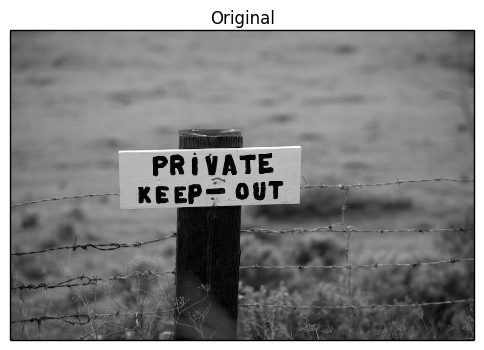

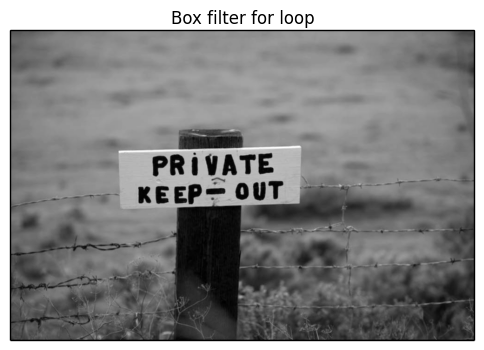

In [16]:
plt.imshow(img, cmap='gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(out_img_for_loop, cmap='gray'), plt.title('Box filter for loop')
plt.xticks([]), plt.yticks([])
plt.show()

#### 2) 

In [17]:
img = cv2.imread('private.jpg', 0)

# my nested for loop function
kernel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
kernel_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
img_padding = np.zeros((img.shape[0]+2, img.shape[1]+2), dtype=np.int)
for i in xrange(img.shape[0]):
    for j in xrange(img.shape[1]):
        img_padding[i+1, j+1] = img[i, j]

magnitude = np.zeros((img.shape[0], img.shape[1]), dtype=np.int)
orientation = np.zeros((img.shape[0], img.shape[1]), dtype=np.float)
out_img_for_loop = np.zeros((img.shape[0], img.shape[1], 3), 'uint8')


for i in xrange(img.shape[0]):
    for j in xrange(img.shape[1]):
        sobel_x = np.sum(kernel_x*img_padding[i:i+3, j:j+3])
        sobel_y = np.sum(kernel_y*img_padding[i:i+3, j:j+3])
        magnitude[i, j] = np.sqrt(sobel_x**2+sobel_y**2)
        orientation[i, j] = (np.arctan2(sobel_y*1.0,sobel_x*1.0)+np.pi)*180/(2*np.pi)
        
mag_max = np.max(magnitude)
for i in xrange(img.shape[0]):
    for j in xrange(img.shape[1]):
        out_img_for_loop[i, j] = [orientation[i, j], 255, magnitude[i, j]*255/mag_max]
bgr_image = cv2.cvtColor(out_img_for_loop, cv2.COLOR_HSV2RGB)

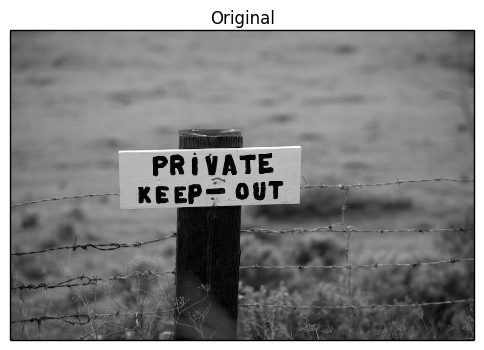

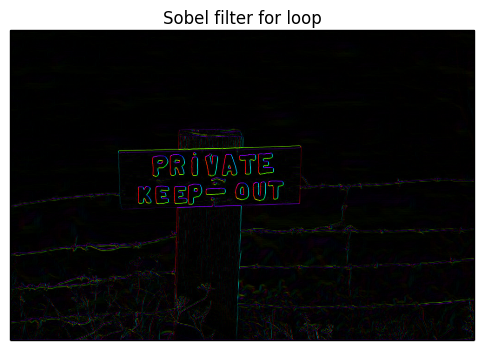

In [18]:
plt.imshow(img, cmap='gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(bgr_image), plt.title('Sobel filter for loop')
plt.xticks([]), plt.yticks([])
plt.show()

#### 3)

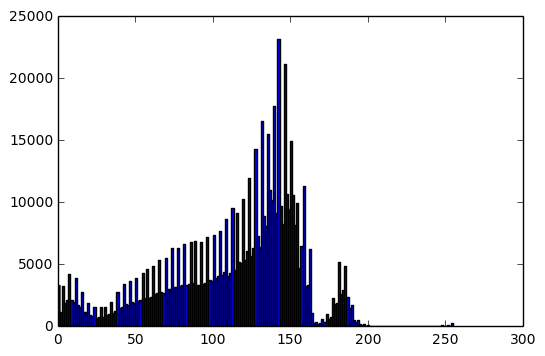

In [19]:
img = cv2.imread('private.jpg', 0)

plt.hist(img.flat, bins='auto')
plt.show()

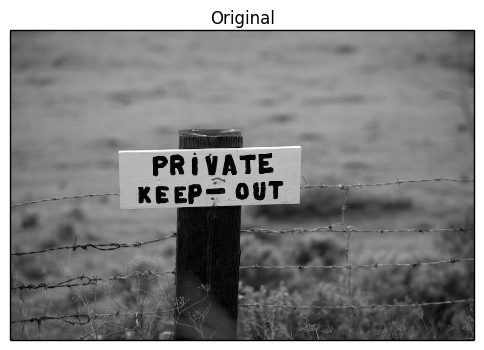

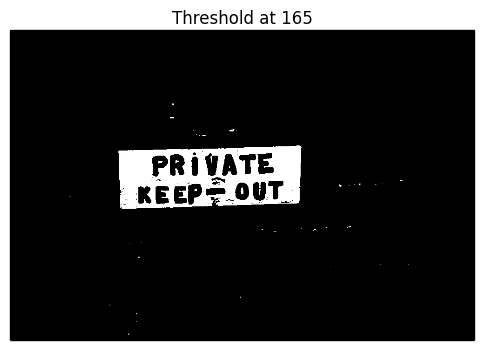

In [20]:
out_img = np.copy(img)

# by inspecating the histogram, we can see there is a small break around 165
# thus we set 165 as the threshold
thresh = 165

for i in xrange(out_img.shape[0]):
    for j in xrange(out_img.shape[1]):
        if (img[i, j] > thresh):
            out_img[i, j] = 255
        else:
            out_img[i, j] = 0

plt.imshow(img, cmap='gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(out_img, cmap='gray'), plt.title('Threshold at 165')
plt.xticks([]), plt.yticks([])
plt.show()